Nous utilisons dans ce TP le module scikit-learn, dédié au Machine Learning. Pour l'utiliser, nous importons les éléments un par un lorsqu'on en a besoin. Et nous allons aussi utiliser d'autres modules, que nous importons ici.

In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

# permet d'afficher les graphiques dans un notebook

Pour appliquer les deux méthodes, nous allons réaliser une étude de cas, avec les données WGI. Celles-ci donnent certains indicateurs sur la gouvernance des pays (plus d'infos sur cette page). Voici donc le code pour les importer dans un data frame pandas, et leur aperçu. Pour information, plus la valeur est haute, meilleur est le pays sur cet indicateur (et inversement).

In [12]:
df=pandas.read_csv("/home/ing/Bureau/tp_SEM/WGI.csv").dropna()

df

,Country,Continent,CorruptionControl,GovEffectiveness,PoliticalStability,RegulatoryQuality,RuleLaw,VoiceAccountability
0,Afghanistan,Asia,-1.563735,-1.222106,-2.749167,-1.327919,-1.616430,-1.086220
1,Albania,Europe,-0.397567,-0.000573,0.257720,0.188962,-0.347468,0.159191
2,Algeria,Africa,-0.691359,-0.544695,-1.139282,-1.171843,-0.849319,-0.877241
4,Andorra,Europe,1.230341,1.860201,1.396047,0.871409,1.564011,1.197540
5,Angola,Africa,-1.411829,-1.039377,-0.386640,-1.001381,-1.080522,-1.167355
...,...,...,...,...,...,...,...,...
204,Vietnam,Asia,-0.396315,0.010342,0.168574,-0.453935,0.048006,-1.407117
206,West Bank and Gaza,Asia,-0.151860,-0.618906,-2.097847,0.064761,-0.306334,-1.169161
207,"Yemen, Rep.",Asia,-1.668297,-1.819497,-2.793776,-1.479933,-1.600989,-1.651756
208,Zambia,Africa,-0.396116,-0.658354,0.183082,-0.483631,-0.302031,-0.300023


# ACP

Dans le sous-module decomposition, nous allons importer la fonction PCA(). Le fonctionnement de celle-ci est similaire à toutes les autres dans scikit-learn.

On créé d'abord un objet (nommé ici pca) qui va contenir le résultat de l'ACP. Dans la fonction PCA(), on pourra aussi indiquer les paramètres tels que le nombre de composants à retenir (n_components - ici on garde tout).
Ensuite, on ajuste (fit en anglais) sur des données avec la fonction fit() de l'objet précédemment créé. Dans cette fonction, nous devons donc passer les données à utiliser (variables uniquement quantitatives).
Si l'on souhaite une ACP normée (ce qui n'est pas le cas ici), il nous faut standardiser les données en amont, avec par exemple la fonction scale() du sous-module preprocessing (importée aussi ici). Bien évidemment, il ne faut passer que des variables quantitatives, sans données manquantes.

In [15]:
from sklearn import decomposition
from sklearn import preprocessing
y=df['Continent']
labels=y.unique
#nums=[j for i in y for j,k in enumerate(y) if k==i]
nums=y.factorize()[0]
x=df.drop(['Country','Continent'], axis=1)
pca=decomposition.PCA(n_components=6)
pca.fit(x)
len(nums)

201

# Variance expliquée¶


L'objet pca comprend maintenant un certain nombre d'objets et de fonctions. Le premier objet est le tableau des variances expliquées (explained_variance_ - proportionnelles aux valeurs propres) par chaque dimension, et le ratio (proportion) de variance expliquée par dimension (explained_variance_ratio_).

In [4]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[5.02734546 0.47250134 0.31926518 0.11493585 0.05219518 0.04079811]
[0.8341316  0.0783969  0.05297213 0.01907003 0.00866017 0.00676918]


Bien évidemment, il est possible (et préférable) de faire un tableau récapitulatif, avec les variances expliquées, les proportions de variance expliquée simples et cumulées. Voici un petit code permettant de faire ceci.

In [5]:
#explained_variance = [pca.explained_variance_, pca.explained_variance_ratio_]

cumul=[pca.explained_variance_ratio_[0]]
for i in range(1,len(pca.explained_variance_ratio_)):
    cumul.append(cumul[i-1] +pca.explained_variance_ratio_[i])
recap_variance= [pca.explained_variance_, pca.explained_variance_ratio_,cumul]
print(recap_variance)

[array([5.02734546, 0.47250134, 0.31926518, 0.11493585, 0.05219518,
       0.04079811]), array([0.8341316 , 0.0783969 , 0.05297213, 0.01907003, 0.00866017,
       0.00676918]), [0.8341316014968845, 0.912528501885845, 0.9655006273087817, 0.9845706563085654, 0.9932308227299421, 1.0]]


L'idée est de représenter graphiquement ces proportions de variances expliquées (qu'on passe en pourcentage par convenance).



<BarContainer object of 6 artists>

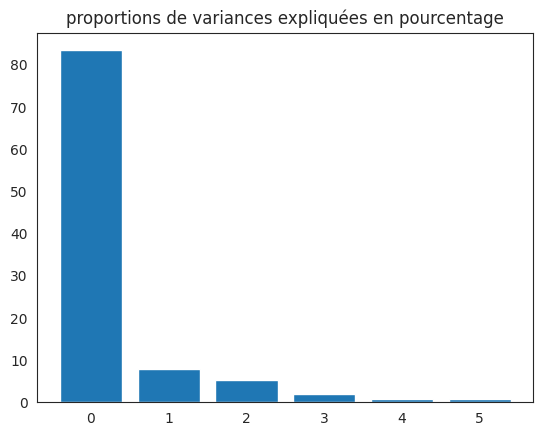

In [6]:
plt.title("proportions de variances expliquées en pourcentage")
plt.bar(range(6),100*pca.explained_variance_ratio_)
#plt.hist(pca.explained_variance_ratio_*100)

# Représentation des individus¶


Nous allons maintenant calculer les coordonnées des iris sur les dimensions, avec la fonction transform() de l'objet pca.



In [7]:

transform=pca.transform(x)

Afin de manipuler plus facilement l'objet obtenu par la suite, nous allons créer un DataFrame pandas en ne prenant que les deux premières dimensions, ainsi que les espèces.



In [18]:

x=transform[:,:2]

Il est maintenant possible de représenter les données sur le premier plan factoriel. Dans ce graphique, il est important de noter le pourcentage de variance expliquée.

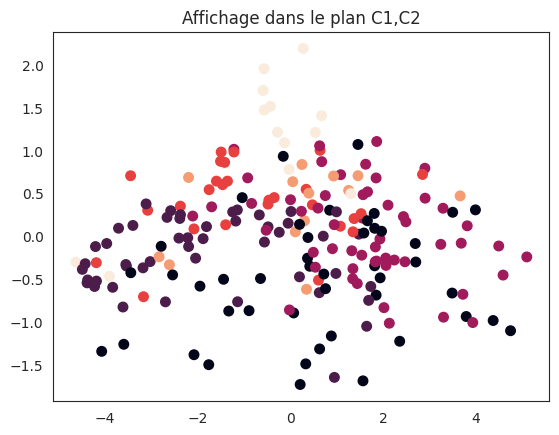

In [19]:
plt.figure
plt.title("Affichage dans le plan C1,C2")
cols=['C0','C1','C2','C3','C4','C5']


plt.scatter(x[:,0], x[:,1],c=nums,s=47,label=labels)

Dans ce même graphique, on veut repérer les individus aux extrêmes. Ci-dessous, nous affichons donc les noms des pays ayant des valeurs absolues élevées pour chaque composante

On pourrait aussi se demander s'il y a un effet continent. Pour cela, nous allons colorer les points en fonction de leur continent donc.



Une fois qu'on a associé une couleur à chaque continent, on peut utiliser ce dictionnaire comme ci-dessous



Il est aussi possible de différencier l'affichage de ce premier plan par continent.

# Représentation des variables¶


Lorsqu'on réalise une ACP, surtout dans un contexte exploratoire (et non de compression), il est absolument nécessaire de décrire les axesà partir des variables, afin de comprendre ce qu'ils représentent. Pour cela, nous devons réaliser le cercle des corrélations. Malheureusement, il faut le réaliser à la main.

Une fois ces coordonnées récupérées, on peut donc afficher ce cercle des corrélations comme ci-dessous.

